In [ ]:
pd.crosstab(df['most ads day'], df['converted'], normalize='index')


converted,False,True
most ads day,,
Friday,0.977788,0.022212
Monday,0.967188,0.032812
Saturday,0.978949,0.021051
Sunday,0.975524,0.024476
Thursday,0.978429,0.021571
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942


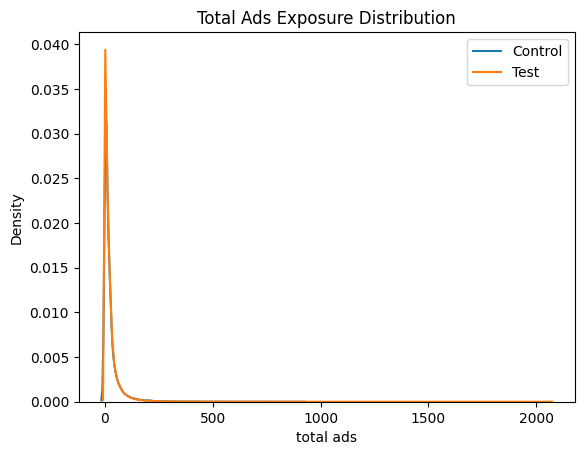

In [ ]:
sns.kdeplot(control['total ads'], label='Control')
sns.kdeplot(test['total ads'], label='Test')
plt.legend()
plt.title("Total Ads Exposure Distribution")
plt.show()


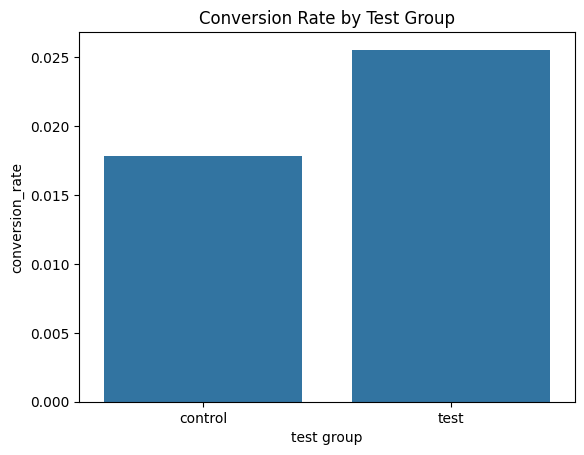

In [ ]:
rates = pd.DataFrame({
    'test group': ['control', 'test'],
    'conversion_rate': [control_rate, test_rate]
})

sns.barplot(x='test group', y='conversion_rate', data=rates)
plt.title("Conversion Rate by Test Group")
plt.show()


In [ ]:
if n_test == 0 or n_control == 0:
    raise ValueError("One of the groups has zero samples. Check group labels.")


In [ ]:
diff = test_rate - control_rate

n_test = len(test)
n_control = len(control)

se = np.sqrt(
    (test_rate * (1 - test_rate) / n_test) +
    (control_rate * (1 - control_rate) / n_control)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

(ci_low, ci_high)


(np.float64(0.00595090043017032), np.float64(0.009434005954232714))

In [ ]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

control_rate, test_rate


(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [ ]:
len(control), len(test)


(23524, 564577)

In [ ]:
control = df[df['test group'] == 'psa']   # control
test = df[df['test group'] == 'ad']       # treatment


In [ ]:
df['test group'].unique()


array(['ad', 'psa'], dtype=object)

In [ ]:
n_control = len(control)
n_test = len(test)

n_control, n_test


(0, 0)

In [ ]:
if p_value < alpha:
    print("Reject H0: Statistically significant difference in conversion")
else:
    print("Fail to reject H0: No statistically significant difference")


Reject H0: Statistically significant difference in conversion


In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
p_value


np.float64(1.9989623063390075e-13)

In [ ]:
contingency = pd.crosstab(df['test group'], df['converted'])
contingency


converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [ ]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

control_rate, test_rate


(nan, nan)

In [ ]:
alpha = 0.05


In [ ]:
control = df[df['test group'] == 'control']
test = df[df['test group'] == 'test']


In [ ]:
df['test group'].value_counts()


,count
test group,
ad,564577
psa,23524


In [ ]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:

# Clean column names
df.columns = df.columns.str.strip()

# Drop useless index column
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df = pd.read_csv("marketing_AB.csv")



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
